# Seaborn - Advanced Plotting
`Seaborn` is a great statistical plotting library for Python. It can be thought of as a more high-level interface to `matplotlib`. While `matplotlib` is very powerful and feature rich, it does not have the most user-friendly interface and the plots often require a lot of tweaking to look presentable. `Seaborn` also has the added benefit of being able to take meta-information extracted from `pandas` dataframes into account. Thus, if you're not familiar with either, I highly recommend you spend some time learning `seaborn` first. 

This tutorial is only meant as a quick introduction, for a full reference, see: http://stanford.edu/~mwaskom/software/seaborn/

In [1]:
# To use seaborn, you must import it to the environment
import seaborn as sns

#Tor this tutorial, we will also import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt


Get financial data and extract price.

In [2]:
syms = symbols(['AAPL', 'IBM', 'MSFT', 'SBUX', 'SPY'])
aapl, ibm, msft, sbux, spy = syms
df = get_pricing(syms)['price']

Compute returns.

In [3]:
df_rets = df.pct_change().dropna()

Individual distributions can easily be plotted using `distplot()`.

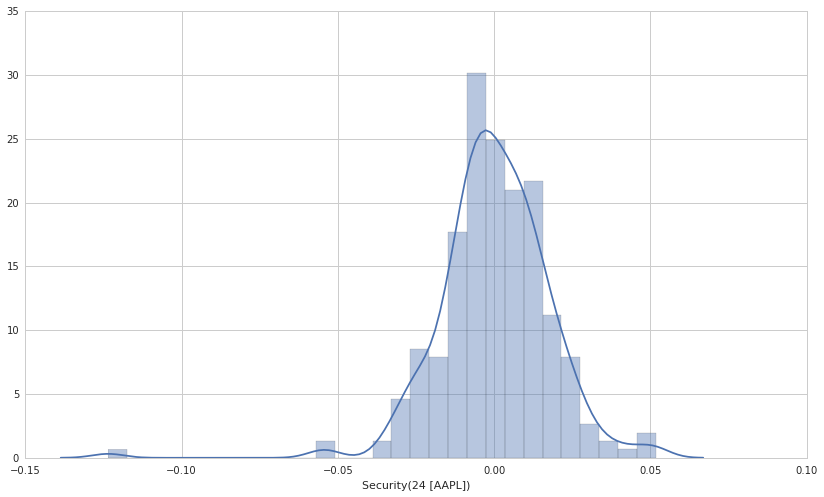

In [4]:
sns.distplot(df_rets[aapl])

To get an overview of the returns distributions of every stock, we can create a `violinplot`.

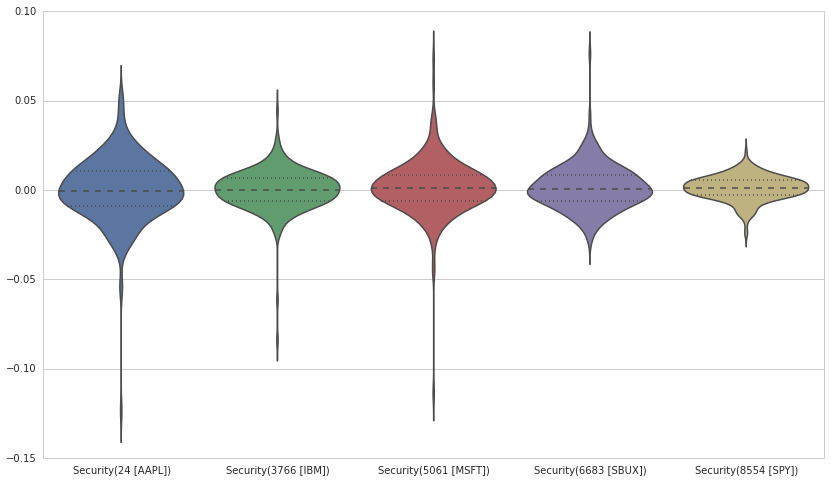

In [5]:
sns.violinplot(df_rets)

Another thing we are often interested in are correlations between the stocks. Using `sns.pairplot()` we can plot all pairwise combinations of stock returns. Along the diagonal we are going to plot the kernel density estimate (KDE) of the returns.

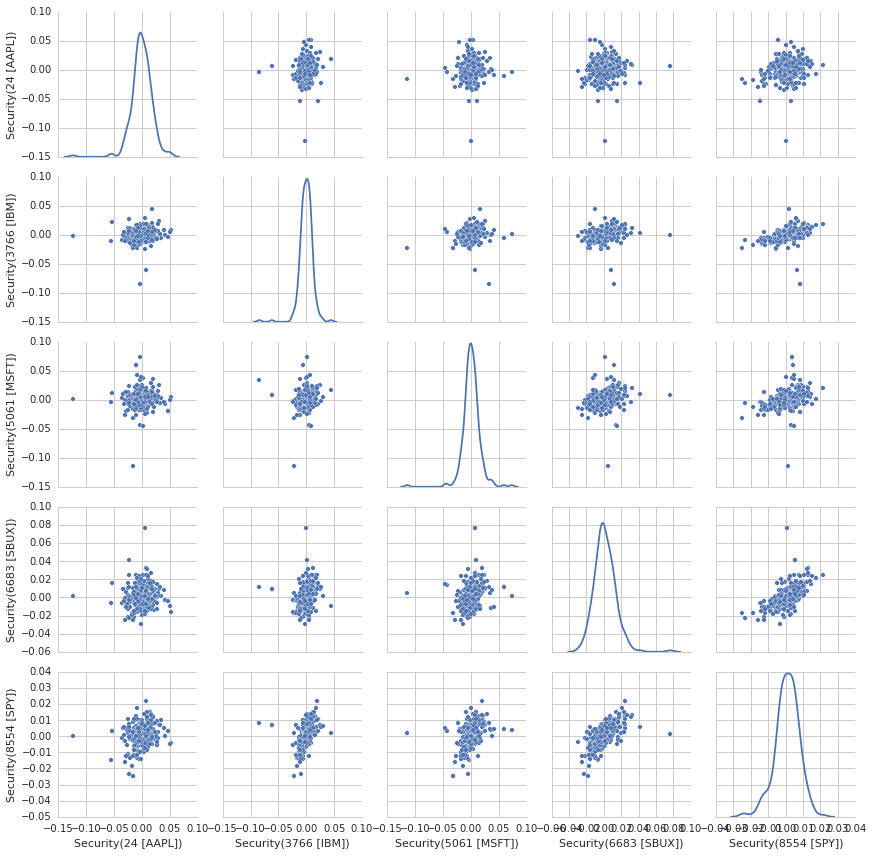

In [6]:
sns.pairplot(df_rets, diag_kind='kde', size=2.4)

To get a more quantitative view of the correlations we can plot a heatmap of the correlation matrix.

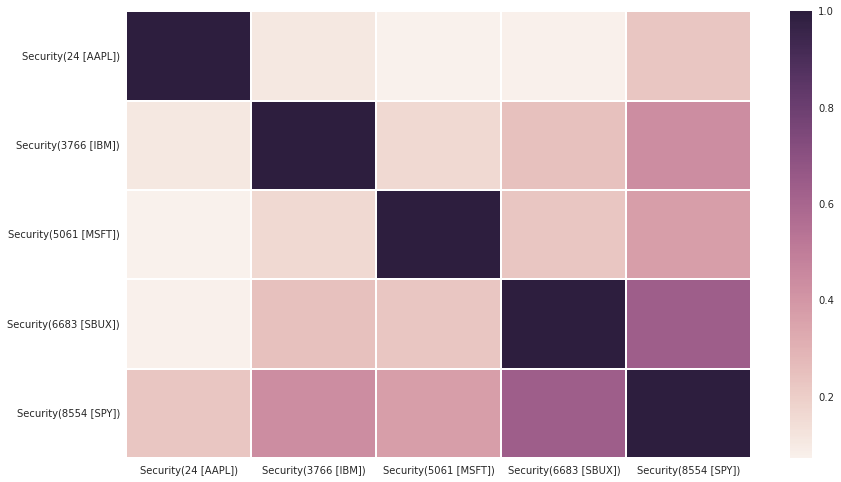

In [7]:
sns.heatmap(df_rets.corr())

Large correlation matrices are often hard to interpret. Hierarchical clustering the rows and columns often reveals the underlying structure (although here the matrix isn't really large enough for this to be interesting).

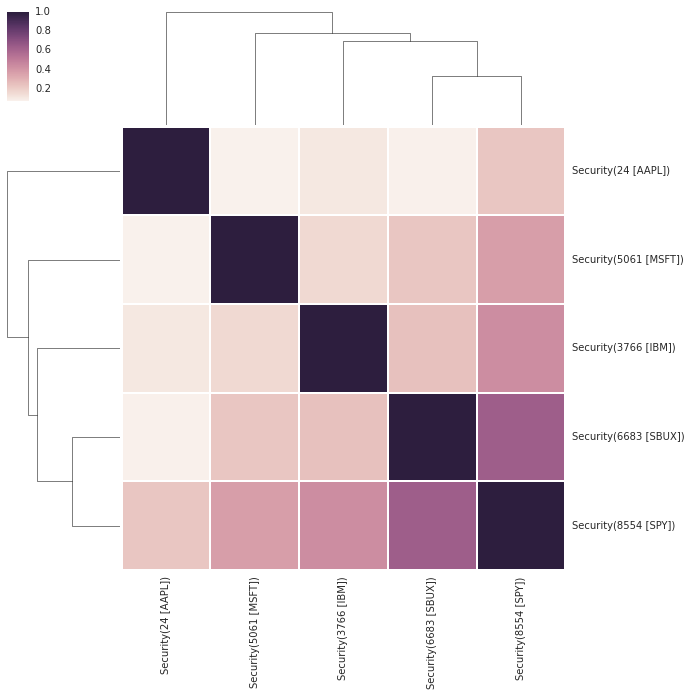

In [8]:
sns.clustermap(df_rets.corr())

It looks like the correlation between `$SBUX` and `$SPY` is quite high. Lets take a closer look using `jointplot()`. The `kind='reg'` keyword argument runs a linear regression and plots the best fitting line, the confidence interval (shaded regions) and the Pearson regression coefficient as well as p-value.

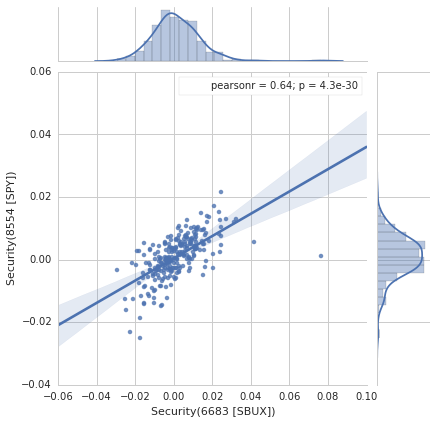

In [9]:
sns.jointplot(sbux, spy, df_rets, kind='reg')